## Objectif
Ce projet vise à explorer un jeu de données musical, effectuer des analyses exploratoires et visuelles, et développer des modèles de classification simples.

### Jeu de données
- Description : Contient des informations sur des morceaux de musique, y compris des métriques de popularité, des genres musicaux, et des caractéristiques audio.

### Étapes principales
1. **Analyse Exploratoire** : Comprendre la structure des données et traiter les valeurs manquantes.
2. **Visualisation des données** : Identifier des relations clés entre les variables.
3. **Machine Learning** : Classifier les genres musicaux à l'aide de modèles supervisés simples.

In [1]:
# Importation des bibliothèques nécessaires pour l'analyse et le traitement des données
import pandas as pd
import numpy as np

# Chargement des données depuis une URL vers un fichier compressé contenant des informations Spotify
url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip"
df_music = pd.read_csv(url)

# Remplacement des valeurs de la colonne 'liveness' par NaN dans les cas suivants :
# - La colonne 'energy' a une valeur comprise entre 0.2 et 0.22
# - La colonne 'genre' n'est ni "Opera" ni "Reggaeton"
# Ce filtrage est appliqué pour ignorer certains genres musicaux spécifiques dans cet intervalle d'énergie
df_music.loc[
    (df_music["energy"] > 0.2) & (df_music["energy"] < 0.22) & 
    (df_music["genre"].isin(["Opera", "Reggaeton"]) == False), 
    "liveness"
] = np.nan

# Affichage du DataFrame mis à jour
df_music

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Analyse Exploratoire des Données

### 1.1 Découverte des données
Dans cette étape, nous explorons la structure générale des données :
- Affichage des premières lignes pour comprendre les colonnes disponibles.
- Description des statistiques des colonnes numériques.
- Identification des valeurs manquantes.

### 1.2 Nettoyage des données
- Traitement des valeurs manquantes pour éviter des biais dans l'analyse.
- Analyse et remplacement des valeurs nulles dans la colonne `liveness`.
- Suppression des lignes inutiles (par exemple, noms de morceaux manquants).

### 1.3 Analyse descriptive
- Analyse de la colonne `popularity` pour comprendre sa distribution et son rôle dans le dataset.
- Identification des artistes avec le plus grand nombre de morceaux.
- Calcul de la popularité moyenne par artiste, triée par ordre décroissant.

In [3]:
# Afficher les premières lignes pour un aperçu des données
display(df_music.head(6))

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.9100,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.7370,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.1310,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.3260,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.2250,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.749,0.578,160627,0.0948,0.000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.358


Décrivez le jeu de données et commentez la colonne popularity.

In [4]:
display(df_music.describe())
display(df_music.info())

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,230620.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215437,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198630,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.129000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.265000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          230620 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

None

In [5]:
print(df_music.shape)

(232725, 18)


In [6]:
display(df_music.isna().sum())

genre                  0
artist_name            0
track_name             1
track_id               0
popularity             0
acousticness           0
danceability           0
duration_ms            0
energy                 0
instrumentalness       0
key                    0
liveness            2105
loudness               0
mode                   0
speechiness            0
tempo                  0
time_signature         0
valence                0
dtype: int64

In [7]:
pourcentage = df_music.liveness.isna().sum() / df_music.shape[0] * 100
print(f'il y a {round(pourcentage, 2)} pourcents de valeurs nulles dans la colonne liveness')

il y a 0.9 pourcents de valeurs nulles dans la colonne liveness


In [8]:
df_music.track_name.dropna(inplace=True)

## Visualisation des Données

### 2.1 Analyse des corrélations
- Création d'une **matrice de corrélation** pour examiner les relations entre les colonnes numériques.
- Interprétation des coefficients de corrélation (positifs ou négatifs).

### 2.2 Nuage de points
- Visualisation des relations entre `energy` et `acousticness` avec un scatterplot.
- Différenciation des genres musicaux `Opera` et `Reggaeton` à l'aide de couleurs.

### 2.3 Boîtes à moustaches
- Comparaison des genres musicaux avec des **boxplots** pour des variables telles que `danceability` et `popularity`.

### 2.4 Graphique interactif
- Utilisation de Plotly pour créer un histogramme interactif de la colonne `energy`.

count    230620.000000
mean          0.215437
std           0.198630
min           0.009670
25%           0.097400
50%           0.129000
75%           0.265000
max           1.000000
Name: liveness, dtype: float64

<Axes: xlabel='liveness', ylabel='Count'>

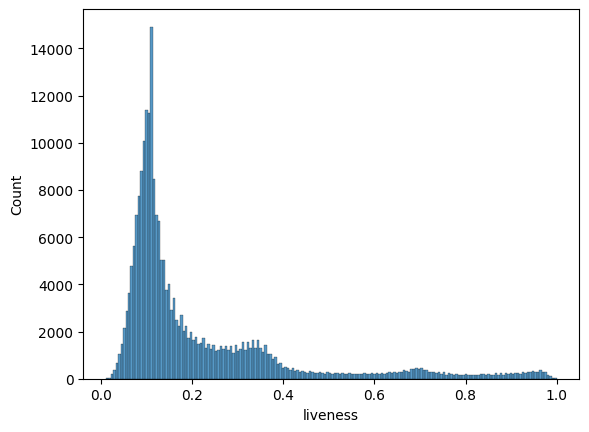

In [9]:
display(df_music.liveness.describe())
sns.histplot(df_music, x='liveness')

In [10]:
df_music['isnull'] = df_music.liveness.apply(lambda x: 1 if np.isnan(x) else 0)

In [11]:
df_music.fillna(value=df_music.liveness.median(), inplace=True)

In [12]:
df_num = df_music.select_dtypes(include=np.number)
correlations = df_num.corr()

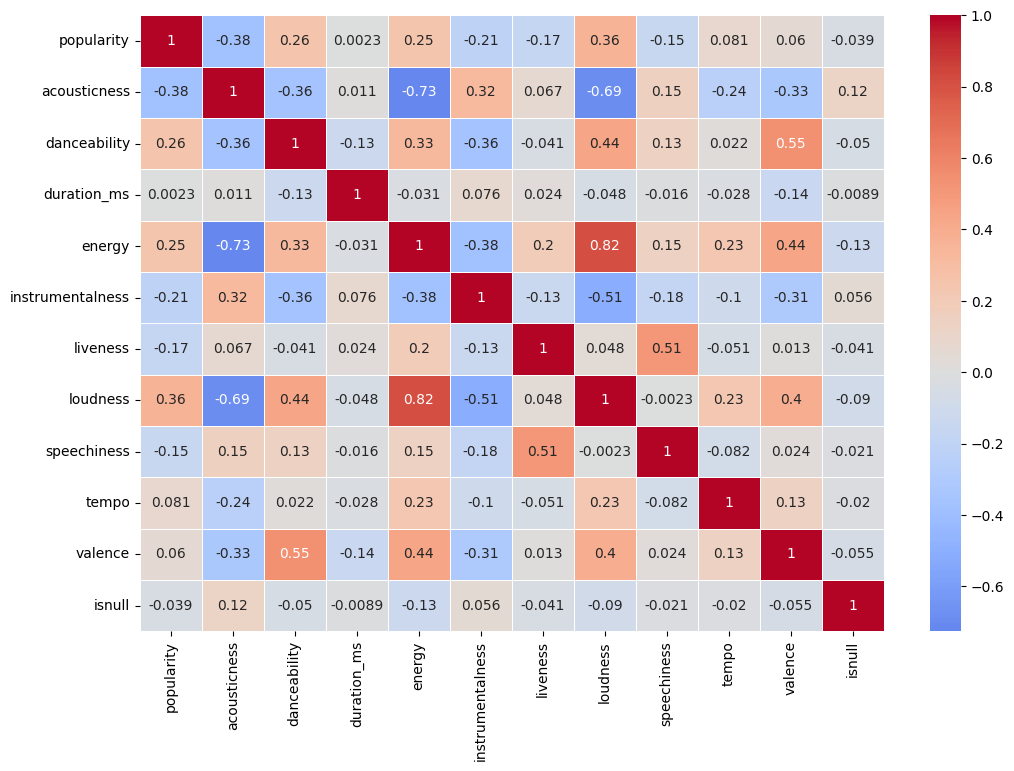

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlations,
    cmap='coolwarm',
    annot=True,
    linewidths=0.5,
    center=0
)
plt.show()

In [14]:
opera_reggaeton = df_music[df_music['genre'].isin(['Opera', 'Reggaeton'])].copy()

<Axes: xlabel='energy', ylabel='acousticness'>

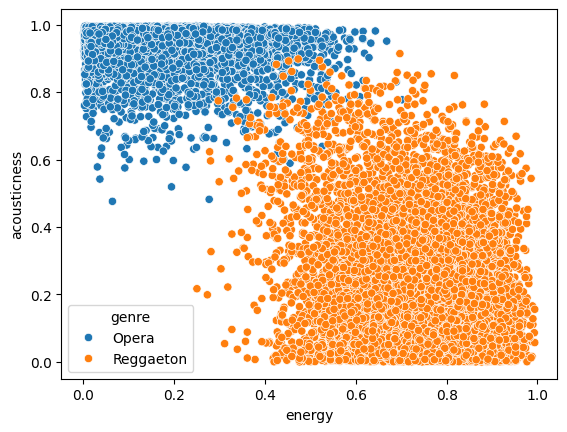

In [15]:
sns.scatterplot(opera_reggaeton, x='energy', y='acousticness', hue='genre')

<Axes: xlabel='genre', ylabel='danceability'>

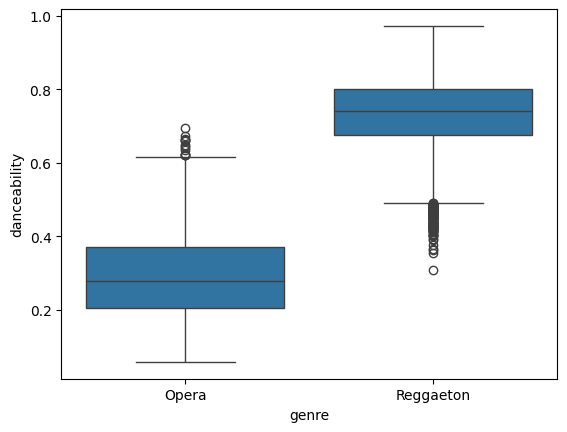

In [16]:
sns.boxplot(opera_reggaeton, y='danceability', x='genre')

In [17]:
import plotly.express as px

In [18]:
opera_reggaeton.time_signature.unique()

array(['3/4', '4/4', '5/4', '1/4', '0/4'], dtype=object)

<Axes: xlabel='genre', ylabel='popularity'>

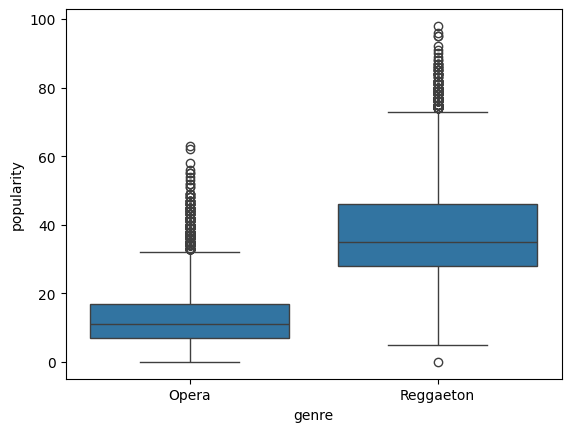

In [19]:
sns.boxplot(opera_reggaeton, y='popularity', x='genre')

<Axes: xlabel='genre', ylabel='valence'>

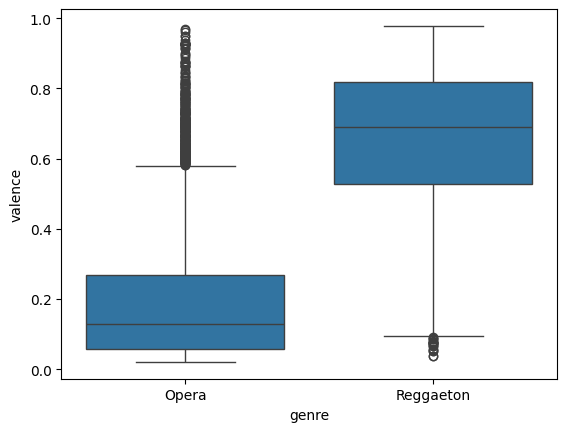

In [20]:
sns.boxplot(opera_reggaeton, y='valence', x='genre')

<Axes: xlabel='genre', ylabel='tempo'>

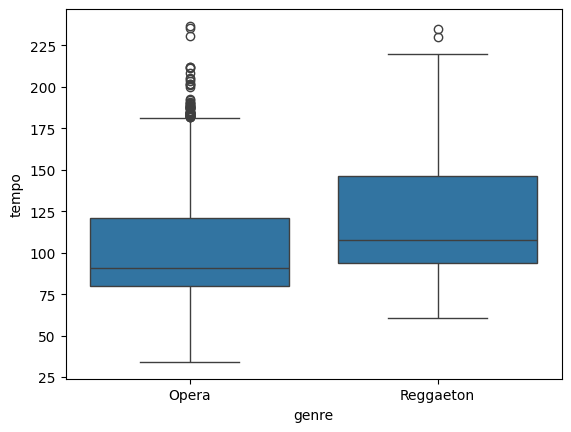

In [21]:
sns.boxplot(opera_reggaeton, y='tempo', x='genre')

<Axes: xlabel='time_signature', ylabel='Count'>

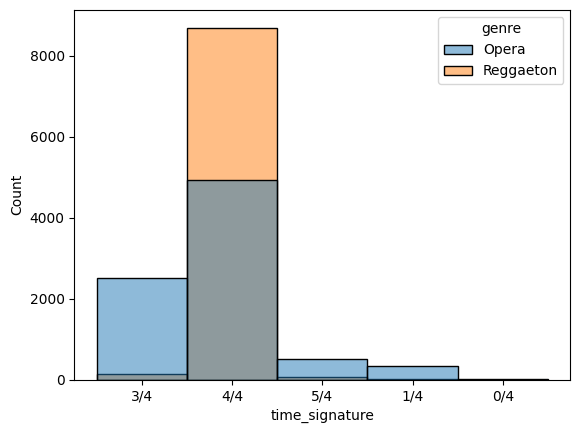

In [22]:
sns.histplot(opera_reggaeton, x='time_signature', hue='genre')

In [23]:
#Je sépare les mesures en 4/4 du reste dans une nouvelle colonne
opera_reggaeton['is_44'] = opera_reggaeton.time_signature.apply(lambda x: 1 if x == '4/4' else 0)

## Machine Learning : Classification des genres musicaux

### Objectif
Développer un modèle de classification pour distinguer les genres musicaux `Opera` et `Reggaeton` à partir de leurs caractéristiques audio. Le modèle utilisé est un K-Nearest Neighbors (KNN).

#### Entraînement du modèle
- Utilisation du classifieur KNN avec les paramètres par défaut.
- Entraînement sur l'ensemble d'entraînement.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [26]:
#Liste des features retenues pour le model
features = ['valence', 'is_44', 'energy', 'danceability', 'acousticness']

In [27]:
X = opera_reggaeton[features]
y = opera_reggaeton['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [28]:
#Pas besoin de changer les echelles puisque toutes mes features sont entre 0 et 1
model = KNeighborsClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)

#### Évaluation des performances
- **Métriques calculées** :
  - `accuracy_score` : Évalue la précision globale du modèle.
  - `f1_score` : Mesure l'équilibre entre la précision et le rappel pour chaque classe (`Opera` et `Reggaeton`).
- **Visualisation des performances** :
  - Matrice de confusion pour analyser les erreurs de classification.

In [29]:
print(f'accuracy : {accuracy_score(y_test, y_pred)}')
print(f'score f1 Reggaeton : {f1_score(y_test, y_pred, pos_label="Reggaeton")}')
print(f'score f1 Opera : {f1_score(y_test, y_pred, pos_label="Opera")}')

accuracy : 0.99907019990702
score f1 Reggaeton : 0.9990917347865577
score f1 Opera : 0.9990476190476191


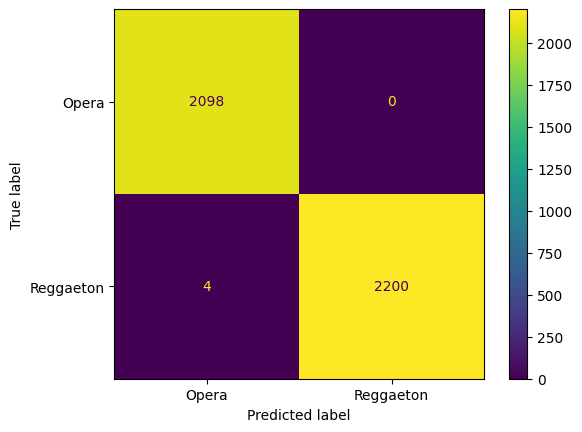

In [30]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

#### Matrice de confusion
- Les erreurs sont quasiment inexistantes :
  - `Opera` : 2098 prédictions correctes, 0 erreur.
  - `Reggaeton` : 2200 prédictions correctes, 4 erreurs.

#### Interprétation
- Les caractéristiques sélectionnées permettent une excellente séparation des deux genres.
- La matrice de confusion montre un déséquilibre négligeable dans les erreurs.